In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import copy, time
import random
import pickle

import mlrfit as mf

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(1001)
random.seed(1001)

#  Matrix definition

In [3]:
m = 800
n = 600


mtype = "dgt"
 
A = mf.dgt_matrix(m, n, d=3, k=5)

In [4]:
filename = "%s_m%d_bcd_als"%(mtype, m)

In [5]:
num_levels = int(np.ceil(np.log2(min(m,n)))+1)
print(f"{num_levels=}")

num_levels=11


In [6]:
rank = num_levels*2

In [7]:
eps_ff = 0.005
eps = 1e-3
ranks = np.ones(num_levels, dtype=np.int32)*(rank // num_levels) 
refined = True
warm_start = False

In [8]:
info = {}
methods = sorted(['als','bcd'])

In [9]:
PSD = False
symm = False

# Spectral partitioning + greedy refinement

In [10]:
hat_A = mf.MLRMatrix()
td_losses, _ = hat_A.hpartition_topdown(A, ranks, eps_ff=eps_ff,\
                                        symm=symm, max_iters_ff=1, PSD=PSD)

/Users/parshakova.tanya/Documents/mlr_fitting/mlrfit/utils.py:404: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, A))
  hat_A_except_level[r1:r2, c1:c2] += np.dot(B_level[r1:r2], C_level[c1:c2].T)


* level=0, losses[0]=0.906, losses[-1]=0.906, len(losses)=2, [2]
* level=1, losses[0]=0.779, losses[-1]=0.779, len(losses)=2, [2 2]
* level=2, losses[0]=0.660, losses[-1]=0.657, len(losses)=2, [2 2 2]
* level=3, losses[0]=0.550, losses[-1]=0.546, len(losses)=2, [2 2 2 2]
* level=4, losses[0]=0.475, losses[-1]=0.471, len(losses)=2, [2 2 2 2 2]
* level=5, losses[0]=0.440, losses[-1]=0.438, len(losses)=2, [2 2 2 2 2 2]
* level=6, losses[0]=0.428, losses[-1]=0.427, len(losses)=2, [2 2 2 2 2 2 2]
* level=7, losses[0]=0.424, losses[-1]=0.423, len(losses)=2, [2 2 2 2 2 2 2 2]
* level=8, losses[0]=0.421, losses[-1]=0.420, len(losses)=2, [2 2 2 2 2 2 2 2 2]
* level=9, losses[0]=0.419, losses[-1]=0.418, len(losses)=2, [2 2 2 2 2 2 2 2 2 2]
* level=10, losses[0]=0.417, losses[-1]=0.417, len(losses)=2, [2 2 2 2 2 2 2 2 2 2 2]
level=10, loss=0.41667705544256606


In [11]:
epoch_len = 10
init_type = 'bcd'

In [12]:
for method in  methods:
    start_time = time.time()
    if method in ['bcd']: eps_ff1 = eps_ff/2.5
    else: eps_ff1 = eps_ff
    losses = hat_A.factor_fit(A, ranks, hat_A.hpart, method=method, eps_ff=eps_ff1, PSD=PSD, \
                                freq=5, svds_v0=True, epoch_len=epoch_len, init_type=init_type,\
                                printing=True, max_iters_ff=10**3, symm=symm, warm_start=False)
    m_time = time.time()-start_time
    
    info[method] = {'loss':losses, 'time':m_time}
    print(f"{method:12s}, {m_time=}, {losses[0]=}, {losses[-1]=}")

itr=0, 0.49117147370330216, [2 2 2 2 2 2 2 2 2 2 2]
itr=5, 0.42958847092065183, [2 2 2 2 2 2 2 2 2 2 2], time_epoch=1.2541661262512207
itr=10, 0.4216396169706212, [2 2 2 2 2 2 2 2 2 2 2], time_epoch=1.35636305809021
itr=15, 0.41592710340925765, [2 2 2 2 2 2 2 2 2 2 2], time_epoch=1.3144209384918213
als         , m_time=26.801811933517456, losses[0]=0.49117147370330216, losses[-1]=0.4138551601413846
itr=0, 0.49117147370330216, [2 2 2 2 2 2 2 2 2 2 2]
itr=5, 0.42721068984232974, [2 2 2 2 2 2 2 2 2 2 2], time_v_epoch=0.8837540149688721, time_loss=0.010970830917358398
itr=10, 0.4206363574240819, [2 2 2 2 2 2 2 2 2 2 2], time_v_epoch=0.8581357002258301, time_loss=0.008408069610595703
itr=15, 0.41565776457850506, [2 2 2 2 2 2 2 2 2 2 2], time_v_epoch=0.8747749328613281, time_loss=0.009053945541381836
bcd         , m_time=17.157546997070312, losses[0]=0.49117147370330216, losses[-1]=0.41360943375188747


In [13]:
with open('outputs/ff_info_%s.pickle'%filename, 'wb') as handle:
    pickle.dump(info, handle, protocol=pickle.HIGHEST_PROTOCOL)

als               , num_iters= 18, loss=0.41385516, t=26.801811933517456
bcd               , num_iters= 19, loss=0.41360943, t=17.157546997070312


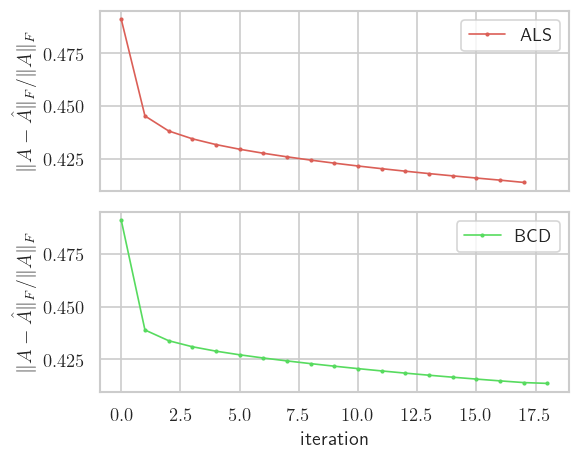

In [14]:
mf.plot_ff_loss_methods(info, iterations=True, dpi=120, figsize=(5, 4), filename="plots/ff_itr%d_%s.pdf"%(1, filename))

als               , num_iters= 18, loss=0.41385516, t=26.801811933517456
bcd               , num_iters= 19, loss=0.41360943, t=17.157546997070312


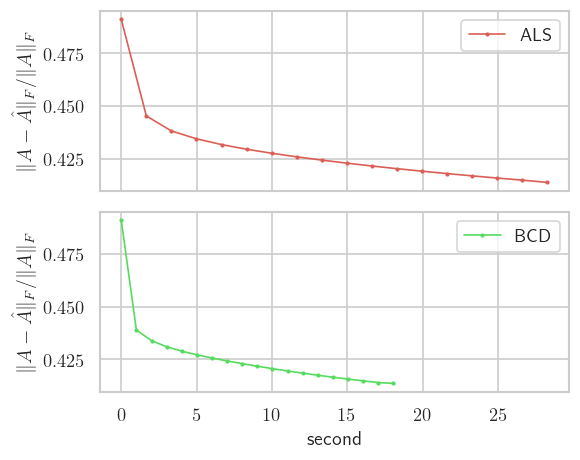

In [15]:
mf.plot_ff_loss_methods(info, iterations=False, dpi=120, figsize=(5, 4), filename="plots/ff_itr%d_%s.pdf"%(0, filename))